<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/insurance_myV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [11]:
# Step 1: Load the dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify file path
file_path = '/content/drive/My Drive/telematics_syn.csv'

# Import pandas (assuming you want to use it to read the CSV)
import pandas as pd

# Read the CSV file
data = pd.read_csv(file_path)

# Step 2: Explore the data
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display basic statistics
print(data.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  U

The reason you see "8 rows x 48 columns" in the last line of the output instead of 52 columns is because the `describe()` method in pandas only returns summary statistics for **numeric** columns by default.

In your dataset, you likely have 4 non-numeric columns (such as categorical or string data). Specifically, these columns could be:

- `Insured.sex` (object type)
- `Marital` (object type)
- `Car.use` (object type)
- `Region` (object type)

These non-numeric columns are excluded from the `describe()` summary, which is why the result only includes the 48 numeric columns.

To see a summary of non-numeric columns, you can pass the argument `include='all'` to the `describe()` function:

```python
data.describe(include='all')
```

This will include statistics for both numeric and non-numeric columns, such as the count, unique values, top value, and frequency for categorical columns.

KeyboardInterrupt: 

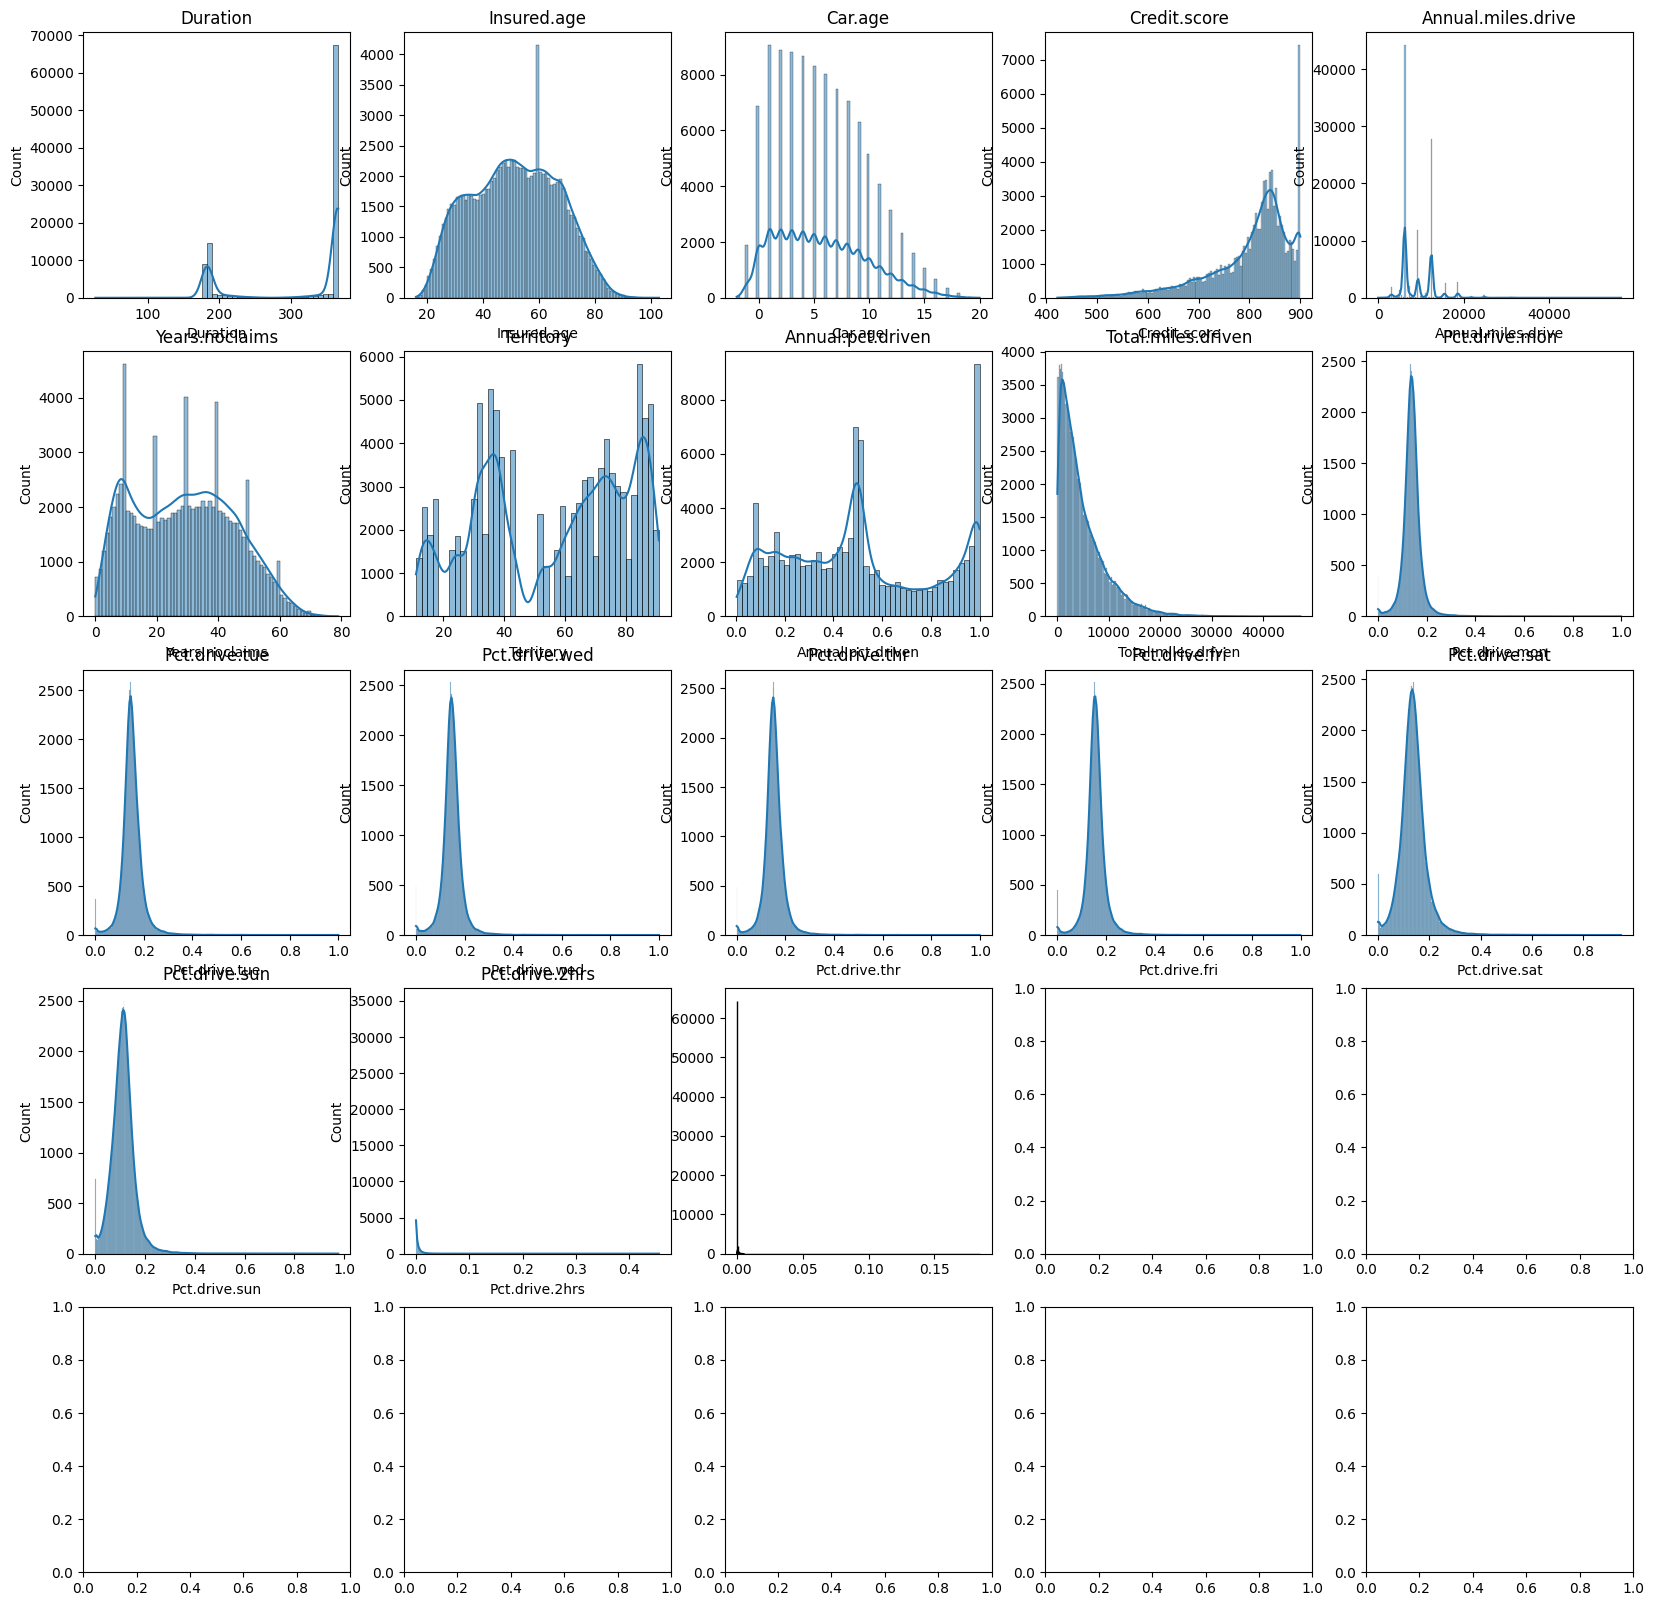

In [12]:
# Step 3: Visualize the data

# Histogram of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.ravel()

for i, col in enumerate(numeric_columns[:25]):  # Limit to 25 columns for readability
    sns.histplot(data[col], ax=axs[i], kde=True)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Correlation heatmap
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Feature engineering
# Create a new feature: total turns
data['total_turns'] = data['left.turns.count'] + data['right.turns.count']

# Create a new feature: turn ratio
data['turn_ratio'] = data['left.turns.count'] / (data['right.turns.count'] + 1)  # Adding 1 to avoid division by zero

# Create a new feature: risk score (example - you may want to adjust this based on domain knowledge)
data['risk_score'] = (data['Insured.age'] * -0.01 +
                      data['Car.age'] * 0.02 +
                      data['Annual.miles.drive'] * 0.001 +
                      data['harsh.accel.count'] * 0.1 +
                      data['harsh.brake.count'] * 0.1 +
                      data['total_turns'] * 0.01)

# Step 5: Prepare data for modeling
# Select features and target
features = ['Duration', 'Insured.age', 'Car.age', 'Credit.score', 'Annual.miles.drive',
            'harsh.accel.count', 'harsh.brake.count', 'total_turns', 'turn_ratio', 'risk_score']
target = 'NB_Claim'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check class imbalance
print("Class distribution before SMOTE:")
print(Counter(y_train))

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after SMOTE:")
print(Counter(y_train_smote))

# The data is now ready for model training and evaluation